
# Pedestrian_feature_analysis






---

### **Exploratory Analysis**
1. **Demographics & Crossing**  
   Do certain age groups (*child, adult, senior*) have different probabilities of crossing?

2. **Gender Effect**  
   Does gender (*male, female*) affect the likelihood of crossing or waiting?

3. **Distraction Influence**  
   Are distracted pedestrians (*yes/no*) more likely to cross compared to attentive ones?

4. **Hand Signal Usage**  
   Does giving a hand signal increase the chance of crossing?

5. **Relative Position**  
   Are pedestrians closer to the road (*near, middle, far*) more likely to cross?

---

### **Behavioral & Contextual Factors**
6. **Dress Code & Crossing**  
   Does pedestrian dress style (*Casual vs Formal*) correlate with crossing behavior?

7. **Location Impact**  
   Are pedestrians on the sidewalk (*onSideWalk vs notOnSidewalk*) more likely to cross?

8. **Fashion Personality & Weight**  
   Do fashion personality or weight categories (even though some have limited values) show any relationship with crossing?

---

### **Behavioral & Demographic Analysis**



---

11. **Does distraction interact with age?**  
   Are *children* more likely to be distracted than *adults* or *seniors*, and how does that affect crossing?

12. **Gender & Hand Signal Interaction**  
   Do *males vs females* differ in their tendency to use a hand signal before crossing?

13. **Age & Relative Position**  
   Are *seniors* more likely to stand *far* from the curb while children stand *near*?

14. **Distracted vs Non-distracted Pedestrians**  
   Do distracted pedestrians have a higher chance of crossing without hand signals?

15. **Combined Risk Profiles**  
   What’s the crossing probability of a pedestrian who is *child + distracted + notOnSidewalk* compared to an *adult + attentive + onSidewalk*?

---

##  **Statistical & Hypothesis Testing**
16. **Chi-Square Tests**  
   Are categorical variables like *gender, distraction, location* significantly associated with crossing?

17. **Correlation Between Features**  
   Are some features correlated (e.g., *location* and *relative position*)?

18. **Conditional Probability**  
   What is the probability of crossing **given** distraction and hand signal presence?

19. **Bayesian Analysis**  
   Using Bayes’ theorem, how does the probability of crossing update when we know the pedestrian is distracted?

20. **Imbalance Check**  
   Is one class (*Crossed vs Waited*) dominating the dataset, and how does that affect prediction?

---

## **Modeling & Predictive Questions**
21. **Model Comparisons**  
   Which algorithm performs best at predicting crossing behavior? (Logistic Regression vs Random Forest vs XGBoost vs Neural Network)

22. **Feature Reduction**  
   If we drop low-variance features (like `weight` or `fashionPersonality`), does model accuracy improve?

23. **Interaction Effects in Models**  
   Do models perform better when we include interaction terms like *age × distraction*?

24. **Fairness & Bias**  
   Does the model treat males and females equally well in predictions (fairness evaluation)?

25. **Scenario Simulation**  
   Can we simulate “what-if” scenarios (e.g., *What if a distracted senior is near the curb?*) to estimate crossing likelihood?

---

## **Practical & Applied Questions**
26. **Safety-Oriented Profiles**  
   Which profiles of pedestrians are *least predictable* (high uncertainty in crossing behavior)?

27. **Critical Feature Combinations**  
   Which combination of features produces the **highest crossing probability**?

28. **Real-Time Prediction Feasibility**  
   Can the model predict crossing in real-time using only a subset of features (e.g., *age, gender, distraction, position*)?

29. **Explainability (SHAP/LIME)**  
   Which individual factors explain a specific prediction for one pedestrian?  

30. **Generalization**  
    If we train the model on one dataset (say, *urban pedestrians*), will it generalize to *suburban or rural pedestrians*?

---



---

### **Predictive & Modeling Questions**
9. **Profile-Based Prediction**  
   Can we build a **classification model** (e.g., Logistic Regression, Decision Tree, Random Forest) to predict if a pedestrian will cross based on their profile?

10. **Feature Importance**  
   Which features (age, gender, distraction, hand signals, location, etc.) are the **strongest predictors** of crossing behavior?

---

These questions cover **EDA**, **hypothesis testing**, and **predictive modeling**.  
You could start by answering the simpler **statistical questions** (1–8), then move to **machine learning** (9–10).  

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
OUTPUT_DIR = "./question_outputs"
LABEL_COL = "Crossed"
FRAME_COL = "frame"
TRACK_COL = "track_id"
os.makedirs(OUTPUT_DIR, exist_ok=True)
%matplotlib inline
df = pd.read_csv("/content/drive/MyDrive/GIU.Master/Version 3/csv/V1/crossing_annotations.csv")   # change if needed)
print("shape:", df.shape)

shape: (1031, 19)


In [50]:
df.head()

,frame,image_path,track_id,xtl,ytl,xbr,ybr,label,dressCodeStyle,location,fashionPersonality,judgmentCalls,age,weight,gender,disability,Distracted,Crossed,relativePosition
0,322,/content/drive/MyDrive/GIU.Master/Version 3/Fr...,5,1137.60,555.8,1190.04,647.65,Crossing,Casual,notOnSidewalk,Minimalist,HandSignal,Senior,NormalWeight,male,False,yes,Waited,near
1,323,/content/drive/MyDrive/GIU.Master/Version 3/Fr...,5,1138.71,555.8,1191.15,647.65,Crossing,Casual,notOnSidewalk,Minimalist,HandSignal,Senior,NormalWeight,male,False,yes,Waited,near
2,324,/content/drive/MyDrive/GIU.Master/Version 3/Fr...,5,1139.82,555.8,1192.26,647.65,Crossing,Casual,notOnSidewalk,Minimalist,HandSignal,Senior,NormalWeight,male,False,yes,Waited,near
3,325,/content/drive/MyDrive/GIU.Master/Version 3/Fr...,5,1140.92,555.8,1193.36,647.65,Crossing,Casual,notOnSidewalk,Minimalist,HandSignal,Senior,NormalWeight,male,False,yes,Waited,near
4,326,/content/drive/MyDrive/GIU.Master/Version 3/Fr...,5,1142.03,555.8,1194.47,647.65,Crossing,Casual,notOnSidewalk,Minimalist,HandSignal,Senior,NormalWeight,male,False,yes,Waited,near


In [51]:
df.columns

Index(['frame', 'image_path', 'track_id', 'xtl', 'ytl', 'xbr', 'ybr', 'label',
       'dressCodeStyle', 'location', 'fashionPersonality', 'judgmentCalls',
       'age', 'weight', 'gender', 'disability', 'Distracted', 'Crossed',
       'relativePosition'],
      dtype='object')

In [52]:
cols=['label',
       'dressCodeStyle', 'location', 'fashionPersonality', 'judgmentCalls',
       'age', 'weight', 'gender', 'disability', 'Distracted', 'Crossed',
       'relativePosition']

for col in cols:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: label
['Crossing']
----------------------------------------
Column: dressCodeStyle
['Casual' 'Formal']
----------------------------------------
Column: location
['notOnSidewalk' 'onSideWalk']
----------------------------------------
Column: fashionPersonality
['Minimalist']
----------------------------------------
Column: judgmentCalls
['HandSignal' 'NoHandSignal']
----------------------------------------
Column: age
['Senior' 'child' 'adult']
----------------------------------------
Column: weight
['NormalWeight']
----------------------------------------
Column: gender
['male' 'female']
----------------------------------------
Column: disability
[False]
----------------------------------------
Column: Distracted
['yes' 'no']
----------------------------------------
Column: Crossed
['Waited' 'Crossed']
----------------------------------------
Column: relativePosition
['near' 'middle' 'far']
----------------------------------------


# Image Processing

## 1. Basic Info & Overview

In [53]:
# Quick overview
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Dataset Shape: (1031, 19)

Columns: ['frame', 'image_path', 'track_id', 'xtl', 'ytl', 'xbr', 'ybr', 'label', 'dressCodeStyle', 'location', 'fashionPersonality', 'judgmentCalls', 'age', 'weight', 'gender', 'disability', 'Distracted', 'Crossed', 'relativePosition']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   frame               1031 non-null   int64  
 1   image_path          1031 non-null   object 
 2   track_id            1031 non-null   int64  
 3   xtl                 1031 non-null   float64
 4   ytl                 1031 non-null   float64
 5   xbr                 1031 non-null   float64
 6   ybr                 1031 non-null   float64
 7   label               1031 non-null   object 
 8   dressCodeStyle      1031 non-null   object 
 9   location            1031 non-null   object 
 10  fashionPersonality  1031 non-

## Group by track_id to make each pedestrian unique

In [54]:
# Group by track_id to make each pedestrian unique
agg_funcs = {
    "age": "first",
    "gender": "first",
    "dressCodeStyle": "first",
    "weight": "first",
    "fashionPersonality": "first",
    "disability": "first",
    "location": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    "judgmentCalls": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    "Distracted": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    "relativePosition": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    "Crossed": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]
}

df_unique = df.groupby("track_id", as_index=False).agg(agg_funcs)

print("Original dataset:", df.shape)
print("Unique pedestrians (by track_id):", df_unique.shape)

df_unique.head()

Original dataset: (1031, 19)
Unique pedestrians (by track_id): (13, 12)


,track_id,age,gender,dressCodeStyle,weight,fashionPersonality,disability,location,judgmentCalls,Distracted,relativePosition,Crossed
0,5,Senior,male,Casual,NormalWeight,Minimalist,False,notOnSidewalk,HandSignal,yes,near,Waited
1,6,Senior,male,Formal,NormalWeight,Minimalist,False,notOnSidewalk,NoHandSignal,no,near,Crossed
2,7,Senior,male,Formal,NormalWeight,Minimalist,False,notOnSidewalk,NoHandSignal,no,near,Crossed
3,8,Senior,male,Formal,NormalWeight,Minimalist,False,notOnSidewalk,NoHandSignal,no,near,Crossed
4,14,Senior,male,Formal,NormalWeight,Minimalist,False,notOnSidewalk,NoHandSignal,no,near,Waited


In [55]:
df_unique.shape

(13, 12)

In [56]:
df=df_unique

## 2. Target Variable Exploration (Crossed)

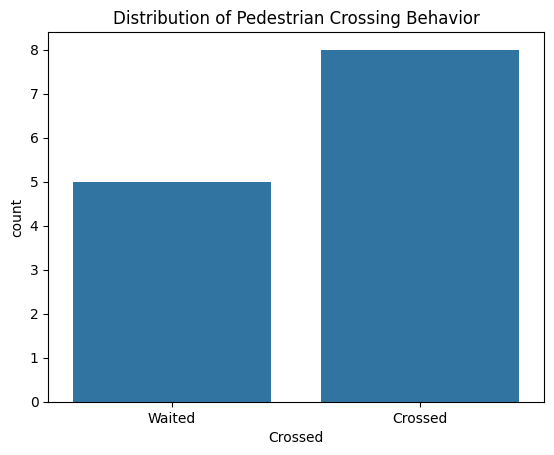

Crossed
Crossed    0.615385
Waited     0.384615
Name: proportion, dtype: float64


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
sns.countplot(data=df, x="Crossed")
plt.title("Distribution of Pedestrian Crossing Behavior")
plt.show()

print(df["Crossed"].value_counts(normalize=True))


## 3. Univariate Analysis

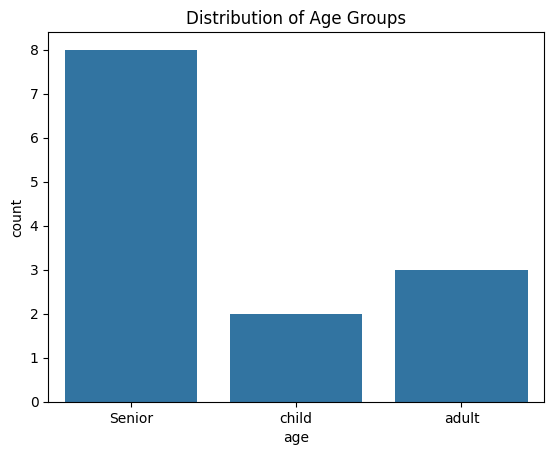

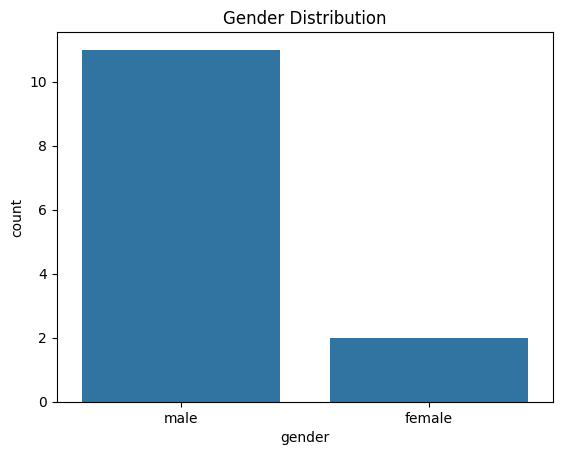

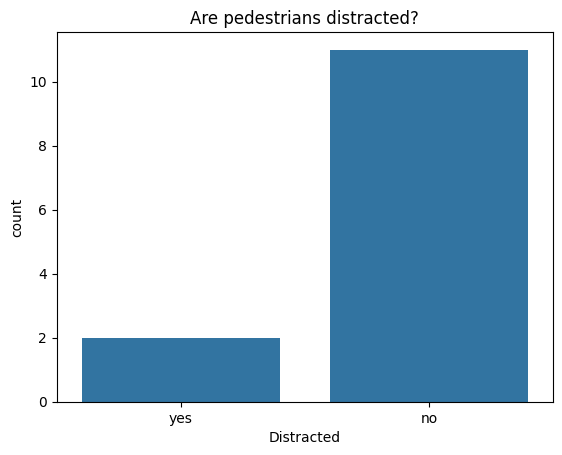

In [58]:
# Age groups distribution
sns.countplot(data=df, x="age")
plt.title("Distribution of Age Groups")
plt.show()

# Gender distribution
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.show()

# Distraction levels
sns.countplot(data=df, x="Distracted")
plt.title("Are pedestrians distracted?")
plt.show()


## 4. Bivariate Analysis (Feature vs Crossing)

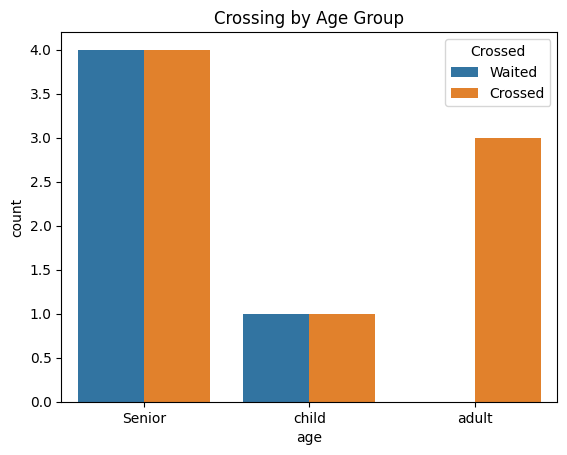

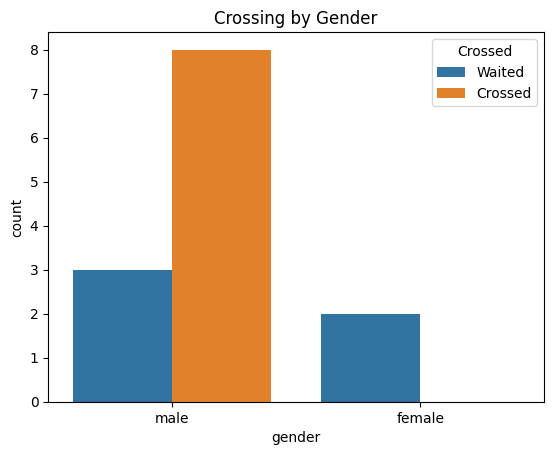

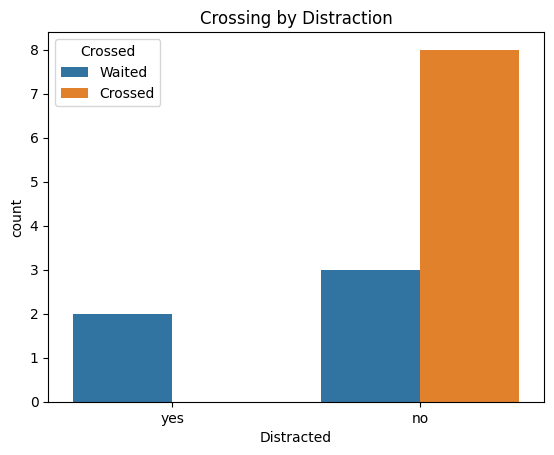

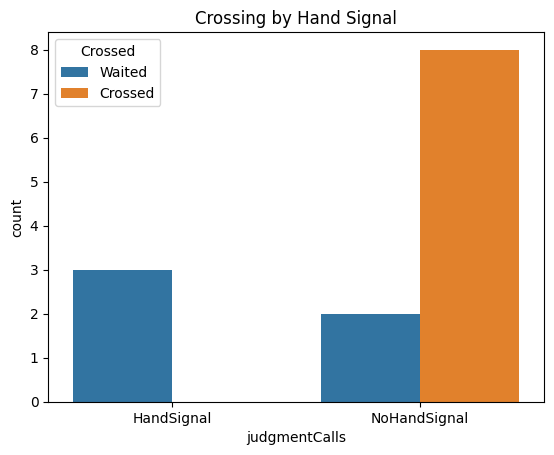

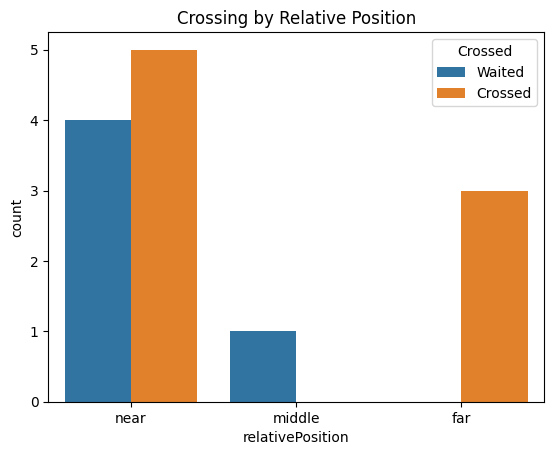

In [59]:
# Age vs Crossing
sns.countplot(data=df, x="age", hue="Crossed")
plt.title("Crossing by Age Group")
plt.show()

# Gender vs Crossing
sns.countplot(data=df, x="gender", hue="Crossed")
plt.title("Crossing by Gender")
plt.show()

# Distracted vs Crossing
sns.countplot(data=df, x="Distracted", hue="Crossed")
plt.title("Crossing by Distraction")
plt.show()

# Hand signals vs Crossing
sns.countplot(data=df, x="judgmentCalls", hue="Crossed")
plt.title("Crossing by Hand Signal")
plt.show()

# Relative position vs Crossing
sns.countplot(data=df, x="relativePosition", hue="Crossed")
plt.title("Crossing by Relative Position")
plt.show()


## 2 Class Balance Check

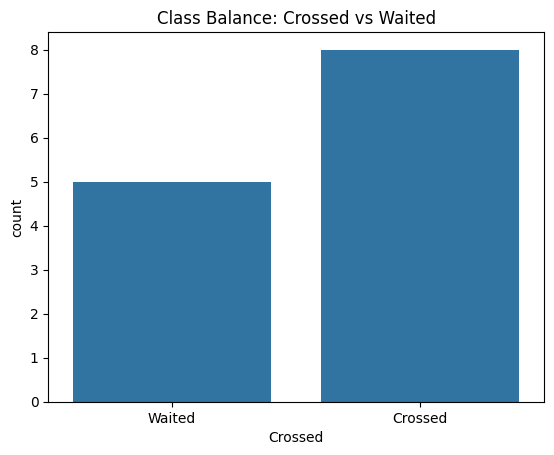

Class Distribution:
Crossed
Crossed    0.615385
Waited     0.384615
Name: proportion, dtype: float64


In [60]:
sns.countplot(data=df, x="Crossed")
plt.title("Class Balance: Crossed vs Waited")
plt.show()

class_balance = df["Crossed"].value_counts(normalize=True)
print("Class Distribution:")
print(class_balance)

## 3.1 Distribution of crossing behavior

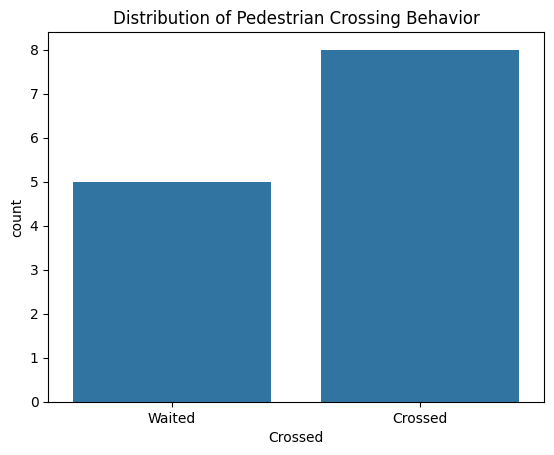

In [61]:
sns.countplot(data=df, x="Crossed")
plt.title("Distribution of Pedestrian Crossing Behavior")
plt.show()

# 3.2 Age vs Crossing

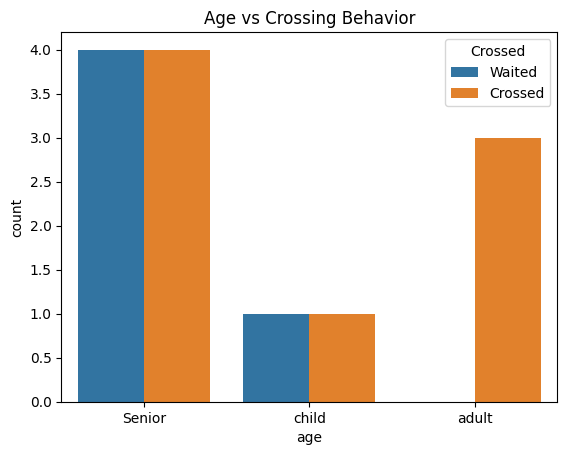

In [62]:
sns.countplot(data=df, x="age", hue="Crossed")
plt.title("Age vs Crossing Behavior")
plt.show()

## 3.3 Gender vs Crossing

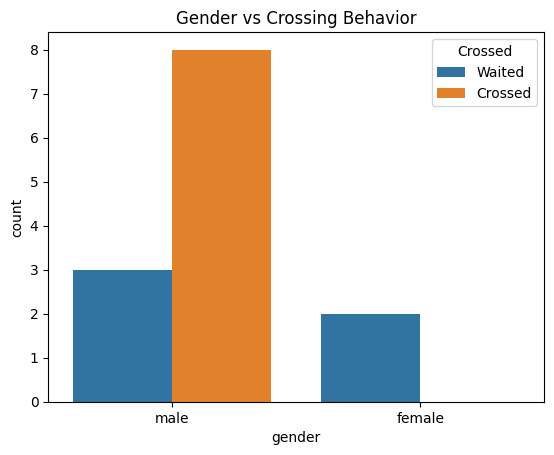

In [63]:
sns.countplot(data=df, x="gender", hue="Crossed")
plt.title("Gender vs Crossing Behavior")
plt.show()

## 3.4 Distraction vs Crossing

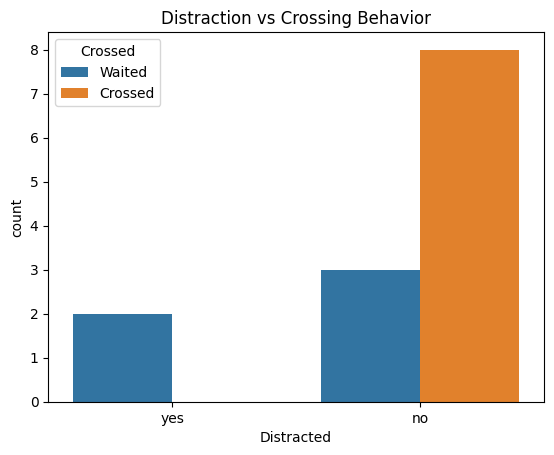

In [64]:
sns.countplot(data=df, x="Distracted", hue="Crossed")
plt.title("Distraction vs Crossing Behavior")
plt.show()

## 3.5 Hand Signal vs Crossing


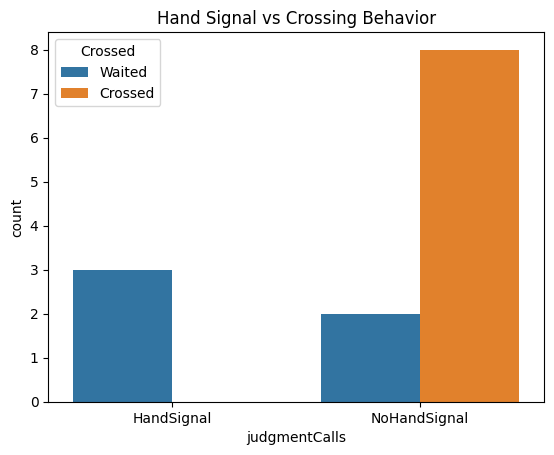

In [65]:
sns.countplot(data=df, x="judgmentCalls", hue="Crossed")
plt.title("Hand Signal vs Crossing Behavior")
plt.show()

# 3.6 Relative Position vs Crossing

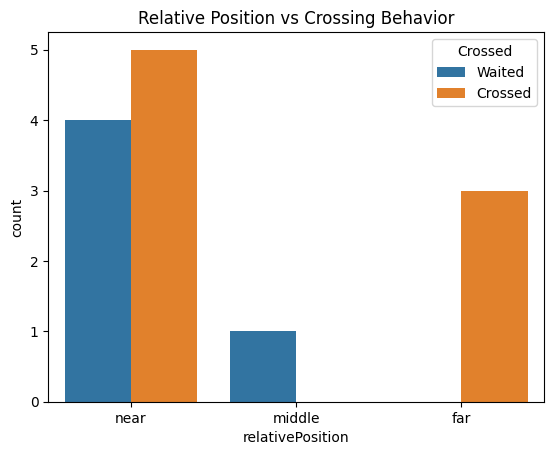

In [66]:
sns.countplot(data=df, x="relativePosition", hue="Crossed")
plt.title("Relative Position vs Crossing Behavior")
plt.show()

## 3.7 Dress Code vs Crossing

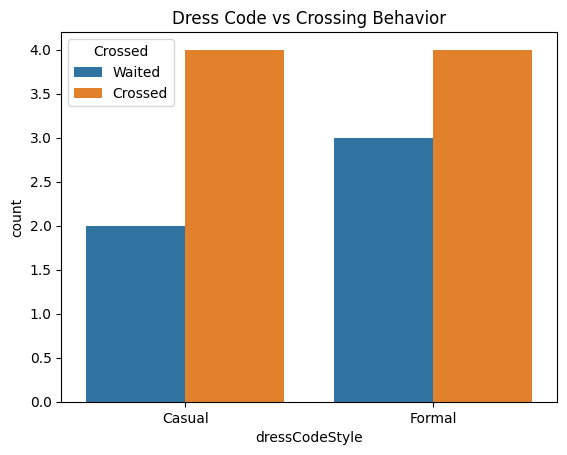

In [67]:
sns.countplot(data=df, x="dressCodeStyle", hue="Crossed")
plt.title("Dress Code vs Crossing Behavior")
plt.show()

## 3.8 Location vs Crossing


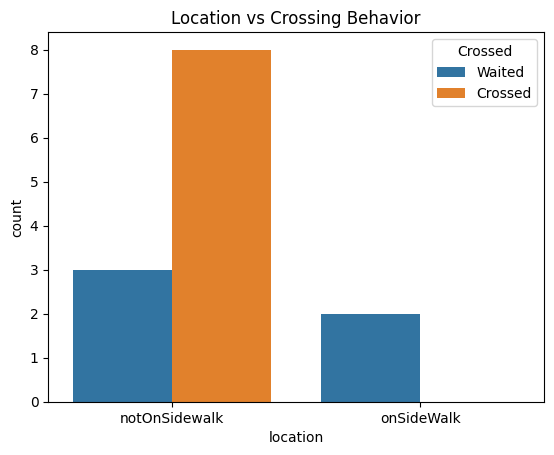

In [68]:
sns.countplot(data=df, x="location", hue="Crossed")
plt.title("Location vs Crossing Behavior")
plt.show()

## 3.9 Age vs Distraction Interaction

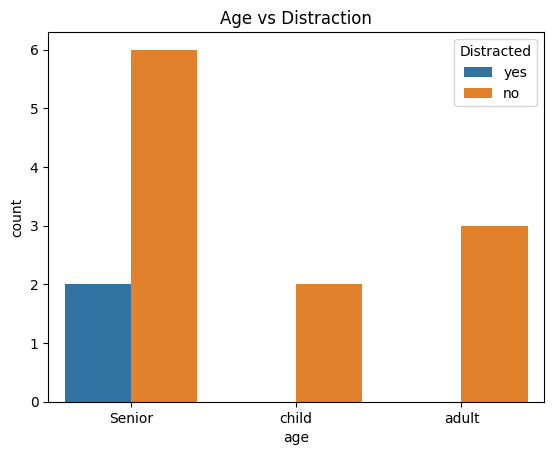

In [69]:
sns.countplot(data=df, x="age", hue="Distracted")
plt.title("Age vs Distraction")
plt.show()

## 3.10 Gender & Hand Signal Interaction

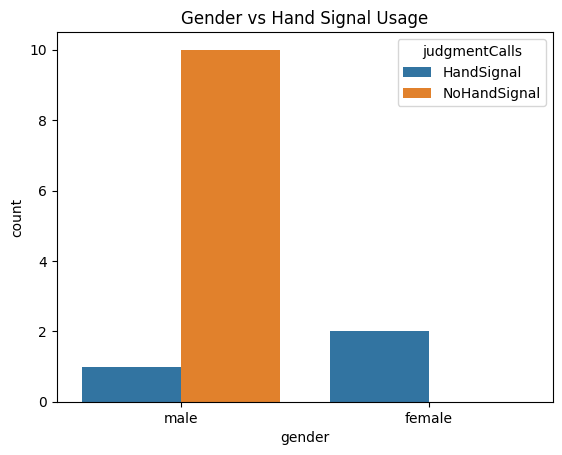

In [70]:
sns.countplot(data=df, x="gender", hue="judgmentCalls")
plt.title("Gender vs Hand Signal Usage")
plt.show()

## 3.11 Age vs Relative Position

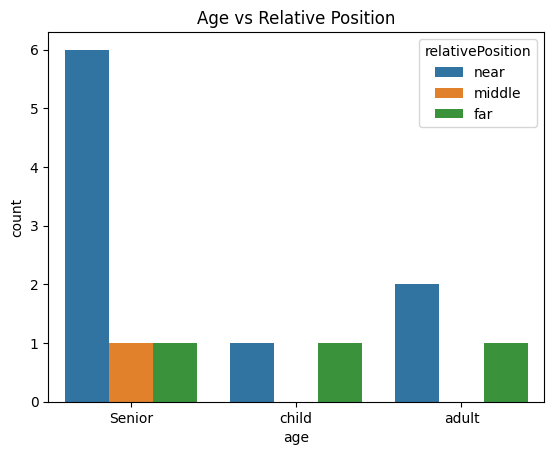

In [71]:
sns.countplot(data=df, x="age", hue="relativePosition")
plt.title("Age vs Relative Position")
plt.show()

## 3.12 Distraction vs Hand Signal

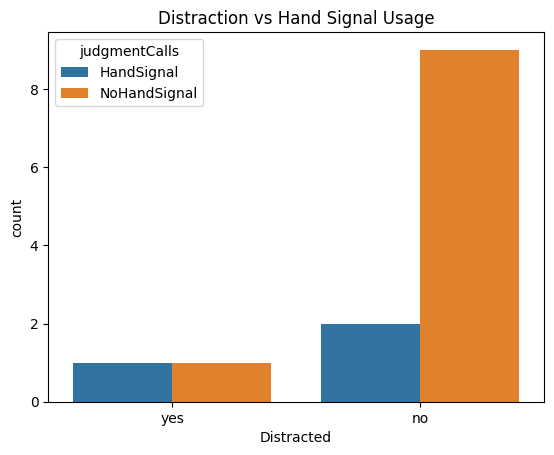

In [72]:
sns.countplot(data=df, x="Distracted", hue="judgmentCalls")
plt.title("Distraction vs Hand Signal Usage")
plt.show()


## 3.13 Combined Risk Profiles (Cross-tab)

In [73]:
risk_table = pd.crosstab(
    [df["age"], df["Distracted"], df["location"]],
    df["Crossed"],
    normalize="index"
)
print("Crossing Probabilities by Age + Distraction + Location:")
print(risk_table)

Crossing Probabilities by Age + Distraction + Location:
Crossed                           Crossed    Waited
age    Distracted location                         
Senior no         notOnSidewalk  0.666667  0.333333
       yes        notOnSidewalk  0.000000  1.000000
                  onSideWalk     0.000000  1.000000
adult  no         notOnSidewalk  1.000000  0.000000
child  no         notOnSidewalk  1.000000  0.000000
                  onSideWalk     0.000000  1.000000


## 3.14 Chi-Square Tests

In [74]:
categorical_vars = ["age", "gender", "Distracted", "judgmentCalls", "location", "relativePosition"]
for col in categorical_vars:
    contingency = pd.crosstab(df[col], df["Crossed"])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"Chi-square Test for {col} vs Crossed: p-value = {p:.4f}")


Chi-square Test for age vs Crossed: p-value = 0.2956
Chi-square Test for gender vs Crossed: p-value = 0.2482
Chi-square Test for Distracted vs Crossed: p-value = 0.2482
Chi-square Test for judgmentCalls vs Crossed: p-value = 0.0685
Chi-square Test for location vs Crossed: p-value = 0.2482
Chi-square Test for relativePosition vs Crossed: p-value = 0.1644


## 3.15 Correlation Between Encoded Features

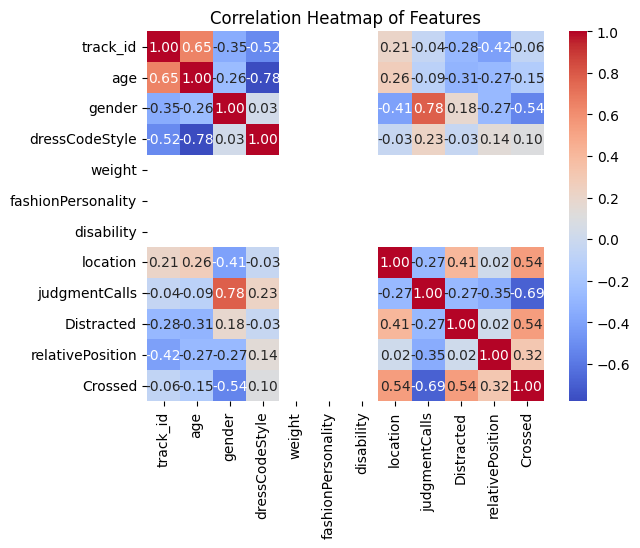

In [75]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object" or df_encoded[col].dtype == "bool":
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


## 3.16 Conditional Probability (P(Crossed | Distracted, Hand Signal))

In [76]:
cond_prob = pd.crosstab([df["Distracted"], df["judgmentCalls"]], df["Crossed"], normalize="index")
print("Conditional Probability of Crossing given Distracted & Hand Signal:")
print(cond_prob)

Conditional Probability of Crossing given Distracted & Hand Signal:
Crossed                    Crossed    Waited
Distracted judgmentCalls                    
no         HandSignal     0.000000  1.000000
           NoHandSignal   0.888889  0.111111
yes        HandSignal     0.000000  1.000000
           NoHandSignal   0.000000  1.000000


## 3.17 Bayesian Analysis Example

In [77]:
p_crossed = (df["Crossed"] == "Crossed").mean()
p_distracted = (df["Distracted"] == "yes").mean()
p_crossed_and_distracted = ((df["Crossed"] == "Crossed") & (df["Distracted"] == "yes")).mean()

bayes_prob = p_crossed_and_distracted / p_distracted
print(f"P(Crossed | Distracted=yes) using Bayes = {bayes_prob:.3f}")

P(Crossed | Distracted=yes) using Bayes = 0.000


#4. Data Preprocessing for ML


## Encode categorical variables

In [78]:
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object" or df_encoded[col].dtype == "bool":
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [79]:
df_encoded.head()


,track_id,age,gender,dressCodeStyle,weight,fashionPersonality,disability,location,judgmentCalls,Distracted,relativePosition,Crossed
0,5,0,1,0,0,0,0,0,0,1,2,1
1,6,0,1,1,0,0,0,0,1,0,2,0
2,7,0,1,1,0,0,0,0,1,0,2,0
3,8,0,1,1,0,0,0,0,1,0,2,0
4,14,0,1,1,0,0,0,0,1,0,2,1


In [80]:

# Features and target
X = df_encoded.drop("Crossed", axis=1)
y = df_encoded["Crossed"]

## Split data


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Modeling

## Random Forest Classifier

In [82]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predictions


In [83]:
y_pred = model.predict(X_test)

# Evaluation

In [84]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion Matrix:
[[2 0]
 [1 0]]


# 6. Feature Importance

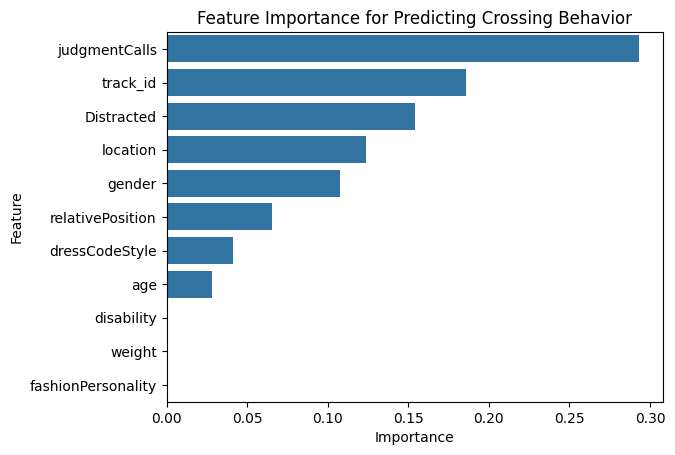

In [85]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(data=feature_importance_df, x="Importance", y="Feature")
plt.title("Feature Importance for Predicting Crossing Behavior")
plt.show()